## HW7 S23 - Starter Code

## Q1: NFL Regression

In [2]:
using DataFrames, DelimitedFiles
using PyPlot, JuMP, HiGHS, Ipopt

In [3]:
teams = [ "49ers", "falcons", "ravens", "steelers", "bears", "vikings", "lions", "saints", "bucs", "patriots", "jets", "packers", "chargers", "raiders", "cardinals", "giants", "panthers", "redskins", "jaguars", "browns", "colts", "chiefs", "eagles", "cowboys", "seahawks", "dolphins","titans", "bills", "broncos", "rams", "bengals" ]
teamIDs = Dict( zip( teams, Array(1:31) ) )
data = readdlm( joinpath(@__DIR__, "nfl.inc" ), header=false)
results_table=Array{Int16,2}(undef, size(data,1),4)
for i in 1:size( data, 1 )
    base = data[ i, 1 ]
    res = data[ i, 2 ]
    splits = split( base, "." )
    week = parse( Int64, splits[1] )
    away = splits[2]
    home = splits[3]
    aid = teamIDs[away]
    hid = teamIDs[home]
    results_table[i,1]=week
    results_table[i,2]=aid
    results_table[i,3]=hid
    results_table[i,4]=res
end
# print(results_table)


n_terms=size(results_table,1)
n_teams=31

31

In [21]:
# Solution for (a)

# your code here

m = Model(HiGHS.Optimizer) 

@variable(m, ratings[1:n_teams])
@variable(m, home_field)
@constraint(m, sum(ratings[i] for i in 1:n_teams) == 0)

@expression(m, pred[i in 1:n_terms], ratings[results_table[i, 3]]-ratings[results_table[i, 2]]+home_field)
@objective(m, Min, sum((pred[i] - results_table[i, 4])^2 for i in 1:n_terms))
    
optimize!(m)
ratingsa = value.(ratings)
hfa = value(home_field)

# print results
for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]))
end
    println("Home field advantage: ", value(home_field))

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 29333.000000, 31, 0.000000, 0.000000, 0, 0.000000, 0.000000
3, 17134.840804, 31, 0.000000, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.7134840737e+04
HiGHS run time      :          0.00
49ers : -7.4447953373501505
falcons : -8.16224547202938
ravens : 4.840011659429398
steelers : 3.1099535124758995
bears : -6.193788456506018
vikings : 0.9390918876671944
lions : 2.354697530270662
saints : 0.487070791469117
bucs : 9.242807323623529
patriots : 2.423993496977115
jets : 4.770665202392323
packers : -0.6581268257660479
chargers : -6.289431917134701
raiders : 7.964138099652889
cardinals : -14.364741602678672
giants : 2.438494881805434
panthers : 0.2763420319238483
redskins : 1.8445897427877407
jaguars : -5.741125251530226
browns : -15.102694387588244
colts : 7.8157988686033875
chiefs : 6.581879367904487
eagles : 2.

#### comment:
The differences in the ratings between these two methods are their values are not exactly the same, though they have similar trend. The ratings (predicted outcomes) with sum-of-squares is more closer to the actual outcomes.

In [13]:
# Solution for (b)

# your code here

m = Model(HiGHS.Optimizer) 

@variable(m, ratings[1:n_teams])
@variable(m, t[1:n_terms])
@variable(m, home_field)

@constraint(m, sum(ratings[i] for i in 1:n_teams) == 0)

@expression(m, pred[i in 1:n_terms], ratings[results_table[i, 3]]-ratings[results_table[i, 2]]+home_field)
for i in 1:n_terms
    @constraint(m, -t[i] <= pred[i] - results_table[i, 4])
    @constraint(m, pred[i] - results_table[i, 4] <= t[i])
end
@objective(m, Min, sum(t[i] for i in 1:n_terms))

optimize!(m)
ratingsb = value.(ratings)
hfb = value(home_field)

for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]))
end
println("Home field advantage: ", value(home_field))

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
287 rows, 175 cols, 1175 nonzeros
287 rows, 175 cols, 1175 nonzeros
Presolve : Reductions: rows 287(-0); columns 175(-0); elements 1175(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.4300000000e+05 Ph1: 144(317000); Du: 143(143) 0s
        305     1.1745714286e+03 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 305
Objective value     :  1.1745714286e+03
HiGHS run time      :          0.01
49ers : -7.073732718894009
falcons : -6.073732718894009
ravens : -0.6451612903225805
steelers : 3.497695852534562
bears : -3.7880184331797224
vikings : 0.35483870967741993
lions : 4.35483870967742
saints : -0.7880184331797242
bucs : 6.069124423963132
patriots : -0.07373271889401067
jets : 4.0691244239631335
packers : -1.07373

In [15]:
# Solution for (c)

# your code here

m = Model(HiGHS.Optimizer) 

@variable(m, ratings[1:n_teams])
@variable(m, home_field[1:n_teams])
@constraint(m, sum(ratings[i] for i in 1:n_teams) == 0)

@expression(m, pred[i in 1:n_terms], ratings[results_table[i, 3]]-ratings[results_table[i, 2]]+home_field[results_table[i, 3]])
@objective(m, Min, sum((pred[i] - results_table[i, 4])^2 for i in 1:n_terms))
    
optimize!(m)

# print results:
for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]),"   home field advantage: ", value(home_field[i]))
end
   

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 29333.000000, 61, 0.000000, 0.000000, 0, 0.000000, 0.000000
3, 13995.507564, 61, 0.000000, 0.000000, 0, 0.000000, 0.948704
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.3995507351e+04
HiGHS run time      :          0.00
49ers : -6.640258153096028   home field advantage: -2.8136208323501988
falcons : -11.99643159634961   home field advantage: 8.16298557145395
ravens : 4.884164738313829   home field advantage: -0.4056746536817149
steelers : 5.542330180118024   home field advantage: -7.004297051004981
bears : -5.032693481639377   home field advantage: 3.1883166003828496
vikings : -3.2499911433372612   home field advantage: 7.991445632878648
lions : 13.161143407657567   home field advantage: -15.165670267176484
saints : 2.0868085304771355   home field advantage: 5.097232265047393
bucs : 5.417221622167478   home field advantage: 11.491344772388

**solution (d)** If the Dolphins were to visit the Seahawks, the expected winner according to the sum-of-squares model would be Dolphins with margin 3.7903501505135955. Using the l_1 model, the expected winner would be Dolphins with margin 4.714285714285715.

In [8]:
findall(x->x=="dolphins", teams) # 26
findall(x->x=="seahawks", teams) # 25

println(ratingsa[25]-ratingsa[26]+hfa)
println(ratingsb[25]-ratingsb[26]+hfb)

-3.7903501505135955
-4.714285714285715


## Q2: Huber Loss

In [7]:
# Q2 Starter Code

using PyPlot, JuMP, Ipopt


y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02];
x = 1:15;



### a)

In [8]:
m = Model(HiGHS.Optimizer) 

@variable(m, a1)
@variable(m, b1)

@expression(m, pred[i in x], a1 * i + b1)
@objective(m, Min, sum((pred[i] - y[i])^2 for i in x))
    
optimize!(m)

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 1262.316800, 2, 0.000000, 0.000000, 0, 0.000000, 0.000000
3, 733.344790, 2, 0.000000, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  7.3334478714e+02
HiGHS run time      :          0.00


##### if without outliers:

In [10]:
m = Model(HiGHS.Optimizer) 

@variable(m, a2)
@variable(m, b2)

@expression(m, pred[i in x], a2 * i + b2)
@objective(m, Min, sum((pred[i] - y[i])^2 for i in x)-(pred[3]-y[3])-(pred[12]-y[12]))
    
optimize!(m)

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 1309.316800, 2, 0.000000, 0.000000, 0, 0.000000, 0.000000
3, 768.378445, 2, 0.000000, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  7.6837844190e+02
HiGHS run time      :          0.00


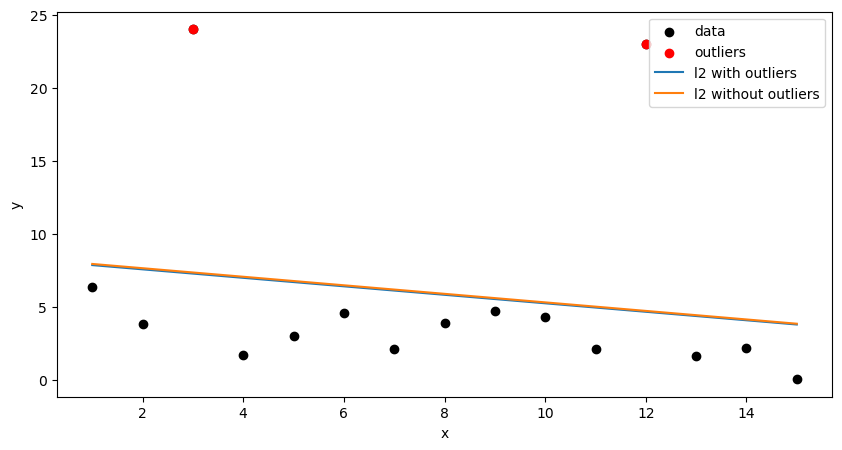

In [11]:
a1 = value(a1)
b1 = value(b1)
a2 = value(a2)
b2 = value(b2)

using PyPlot
figure(figsize = (10,5))
scatter(x,y,label="data",color = "black")
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red") # outliers
plot(x, a1*x .+ b1,label="l2 with outliers")
plot(x, a2*x .+ b2,label="l2 without outliers")
# plot(x, a3*x .+ b3,label="l1 with outliers")
# plot(x, a5*x .+ b5,label="Huber with outliers")
legend(loc ="best")
ylabel("y")
xlabel("x")
;

### b)

The l1 cost handle outliers better than the least squares. It is more fitted to the good data points, because if lines are same, the cost of outliers with l1 norm is smaller than the cost of outliers with least squares. To minimize the cost, the line with least squares will be farther from non-outliers, nearer to outliers, compared to the line with l1 cost. So the line of l1 cost better fit the non-outliers.

In [26]:
m = Model(HiGHS.Optimizer) 

@variable(m, a3)
@variable(m, b3)
@variable(m, t[x] >= 0)

@expression(m, pred[i in x], a3 * i + b3)
@constraint(m, -t .<= pred - y)
@constraint(m, pred - y .<= t)

@objective(m, Min, sum(t[i] for i in x))
    
optimize!(m)

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
30 rows, 17 cols, 90 nonzeros
30 rows, 17 cols, 90 nonzeros
Presolve : Reductions: rows 30(-0); columns 17(-0); elements 90(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 15(72.555); Du: 0(1.12313e-12) 0s
         18     5.4030000000e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 18
Objective value     :  5.4030000000e+01
HiGHS run time      :          0.01


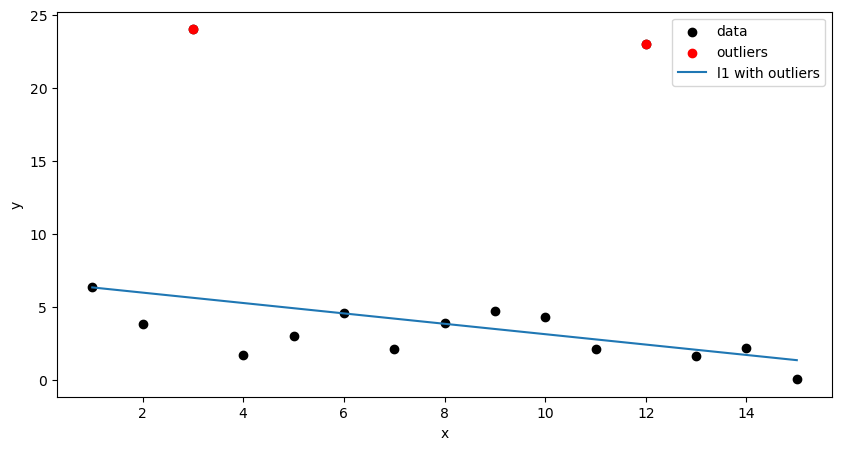

In [27]:
a3 = value(a3)
b3 = value(b3)

using PyPlot
figure(figsize = (10,5))
scatter(x,y,label="data",color = "black")
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red") # outliers
# plot(x, a1*x .+ b1,label="l2 with outliers")
plot(x, a3*x .+ b3,label="l1 with outliers")
# plot(x, a5*x .+ b5,label="Huber with outliers")
legend(loc ="best")
ylabel("y")
xlabel("x")
;

### c)

In [28]:
m = Model(Ipopt.Optimizer) 
M = 1

@variable(m, a5)
@variable(m, b5)
@variable(m, w[x] .<= M)
@variable(m, v[x] .>= 0)
@variable(m, t[x] >= 0)

@expression(m, pred[i in x], a5 * i + b5)
@constraint(m, -t .<= pred - y)
@constraint(m, pred - y .<= t)

@constraint(m, t .<= w + v)

@objective(m, Min, sum(w[i]^2 + 2 * M * v[i] for i in x))
    
optimize!(m)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      135
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:       47
                     variables with only lower bounds:       30
                variables with lower and upper bounds:        0
                     variables with only upper bounds:       15
Total number of equality constraints.................:        0
Total number of inequality co

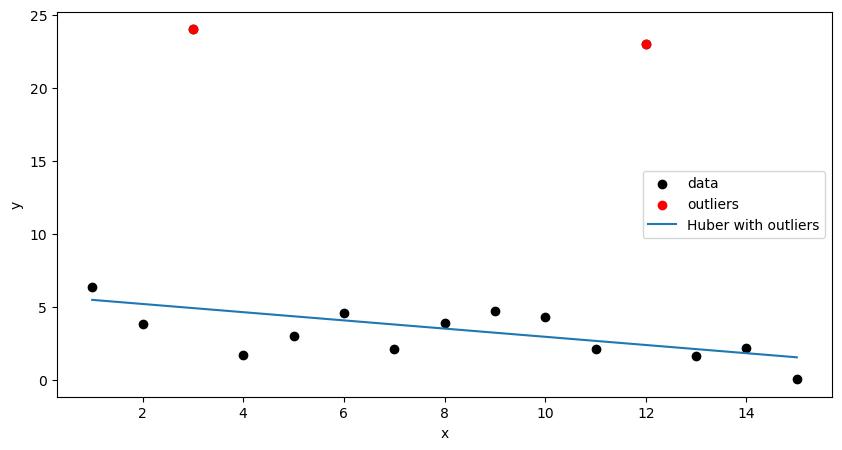

In [29]:
a5 = value(a5)
b5 = value(b5)

using PyPlot
figure(figsize = (10,5))
scatter(x,y,label="data",color = "black")
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red") # outliers
# plot(x, a1*x .+ b1,label="l2 with outliers")
# plot(x, a3*x .+ b3,label="l1 with outliers")
plot(x, a5*x .+ b5,label="Huber with outliers")
legend(loc ="best")
ylabel("y")
xlabel("x")
;

In [30]:
println("a = ", a5)
println("b = ", b5)

a = -0.2811079890443627
b = 5.738120548352265


### d)
The Huber loss technique gives the best fit to  the non-outlier data.

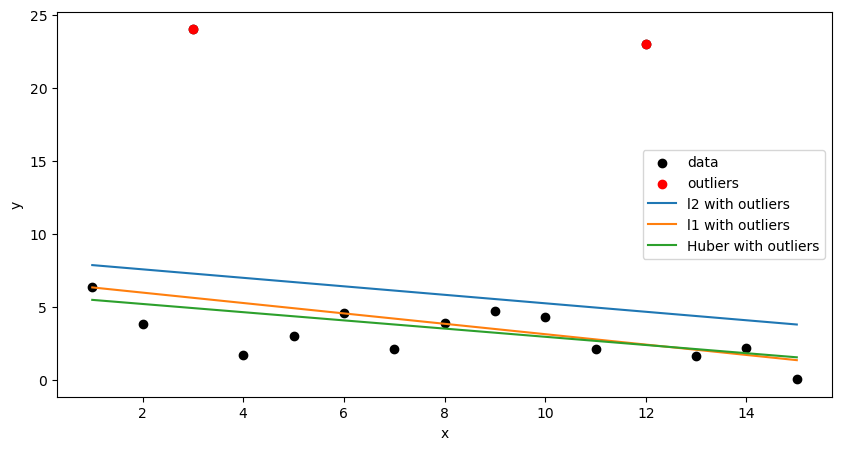

In [75]:
# Make all the plots

# fill in random numbers - replace with the values of  (a,b) found in parts (a), (b), and (c)
# a1,  a3, a5,  b1, b3, b5 = rand(1,6);

using PyPlot
figure(figsize = (10,5))
scatter(x,y,label="data",color = "black")
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red") # outliers
plot(x, a1*x .+ b1,label="l2 with outliers")
plot(x, a3*x .+ b3,label="l1 with outliers")
plot(x, a5*x .+ b5,label="Huber with outliers")
legend(loc ="best")
ylabel("y")
xlabel("x")
;

## 3. Heat pipe design

geometric program:
$$~~\max_{r,T,w}~~\alpha_{4}Tr^2$$
$$s.t.~~\alpha_{1}Tr/w + \alpha_{2}r + \alpha_{3}rw \leq C_{max}$$
$$T_{min} \leq T \leq T_{max}$$
$$r_{min} \leq r \leq r_{max}$$
$$w_{min} \leq w \leq w_{max}$$
$$w \leq 0.1r$$

convex program:
$$~~\max_{r,T,w}~~log(\alpha_{4})+x+2y$$
$$s.t.~~log(e^{log(\alpha_{1})+x+y-z} + e^{log(\alpha_{2})+y} + e^{log(\alpha_{3})+y+z}) \leq log(C_{max})$$
$$log(T_{min}) \leq x \leq log(T_{max})$$
$$log(r_{min}) \leq y \leq log(r_{max})$$
$$log(w_{min}) \leq z \leq log(w_{max})$$
$$z \leq log(0.1)+y$$

$$x := log~T,y := log~r,z := log~w$$

In [6]:
m = Model(Ipopt.Optimizer) 

@variable(m, x)
@variable(m, y)
@variable(m, z)

@NLconstraint(m, z <= log(0.1) + y)
@NLconstraint(m, log(exp(x+y-z) + exp(y) + exp(y+z)) <= log(500))

@objective(m, Max, x + 2y)
    
optimize!(m)

println("T: ", exp(value(x)))
println("r: ", exp(value(y)))
println("w: ", exp(value(z)))
println("objective value: ", exp(objective_value(m)))

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.30e+00 7.71e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

T: 23.840239130821068

r: 46.39042836246195

w: 4.639042762239439

objective value: 51305.907379387674
